# Task:1 Import library

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from jupyterthemes import jtplot #pip install jupyterthemes
jtplot.style(theme='monokai',context='notebook',ticks=True,grid=False)

In [9]:
#read csv file
admission_df=pd.read_csv("Admission_Predict.csv")

In [10]:
admission_df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [11]:
#Let's drop the serial no.
admission_df.drop('Serial No.',axis=1,inplace=True)
admission_df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


# Task :2 Perform exploratory data analysis

In [12]:
#checking the null values
admission_df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [13]:
#check the dataframe information
admission_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


In [14]:
#statistical summary of the dataframe
admission_df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [15]:
#grouping by university ranking
df_university=admission_df.groupby(by='University Rating').mean()
df_university

,GRE Score,TOEFL Score,SOP,LOR,CGPA,Research,Chance of Admit
University Rating,,,,,,,
1,304.911765,100.205882,1.941176,2.426471,7.798529,0.294118,0.562059
2,309.134921,103.444444,2.682540,2.956349,8.177778,0.293651,0.626111
3,315.030864,106.314815,3.308642,3.401235,8.500123,0.537037,0.702901
4,323.304762,110.961905,4.000000,3.947619,8.936667,0.780952,0.801619
5,327.890411,113.438356,4.479452,4.404110,9.278082,0.876712,0.888082


# Task-3: Perform data visulazation

array([[<Axes: title={'center': 'GRE Score'}>,
        <Axes: title={'center': 'TOEFL Score'}>,
        <Axes: title={'center': 'University Rating'}>],
       [<Axes: title={'center': 'SOP'}>,
        <Axes: title={'center': 'LOR '}>,
        <Axes: title={'center': 'CGPA'}>],
       [<Axes: title={'center': 'Research'}>,
        <Axes: title={'center': 'Chance of Admit'}>, <Axes: >]],
      dtype=object)

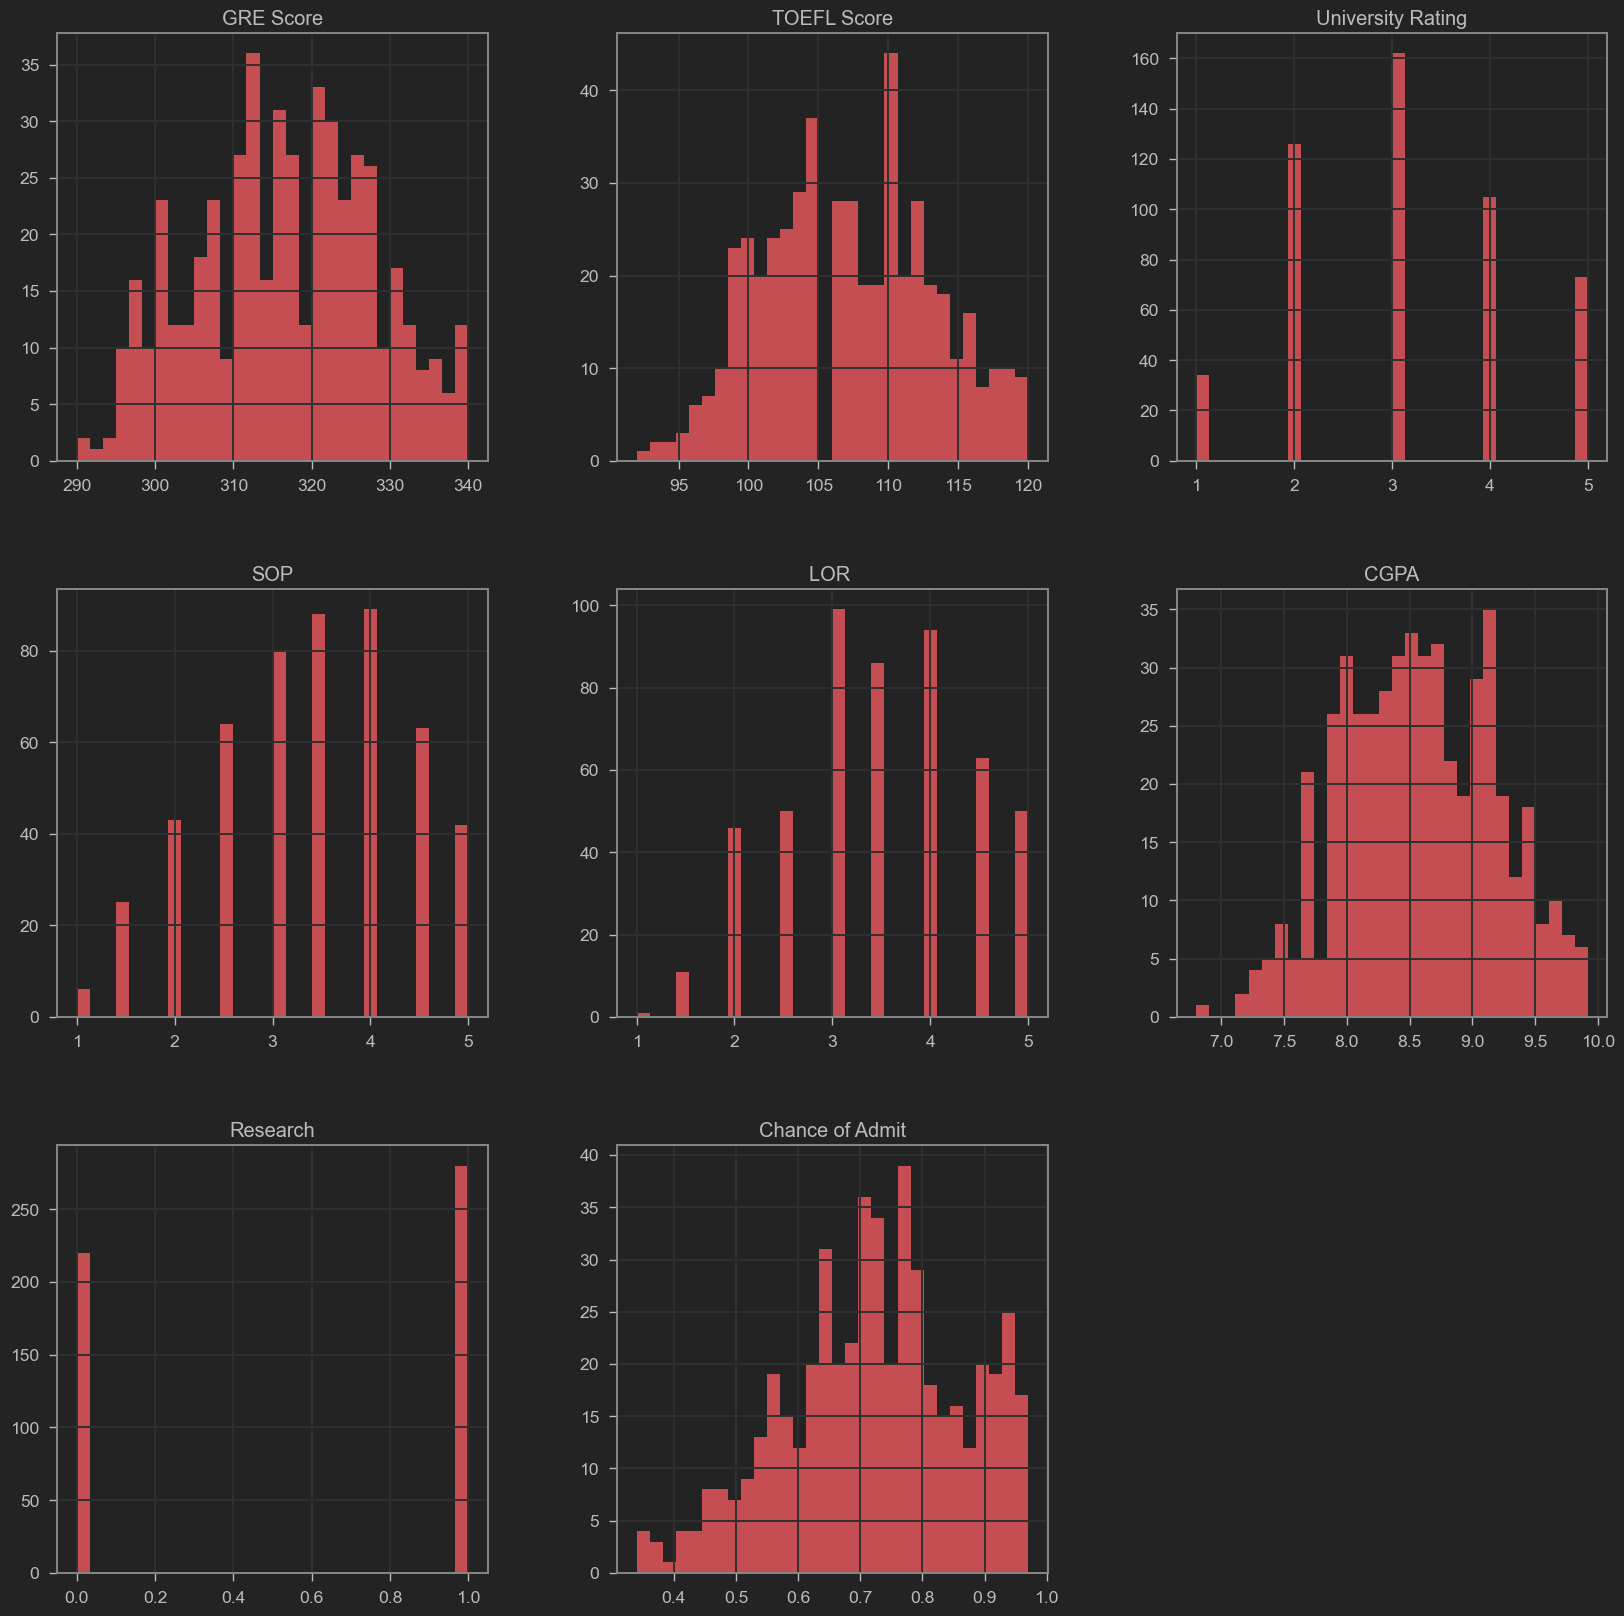

In [16]:
admission_df.hist(bins=30,figsize=(20,20),color='r')
#histogram

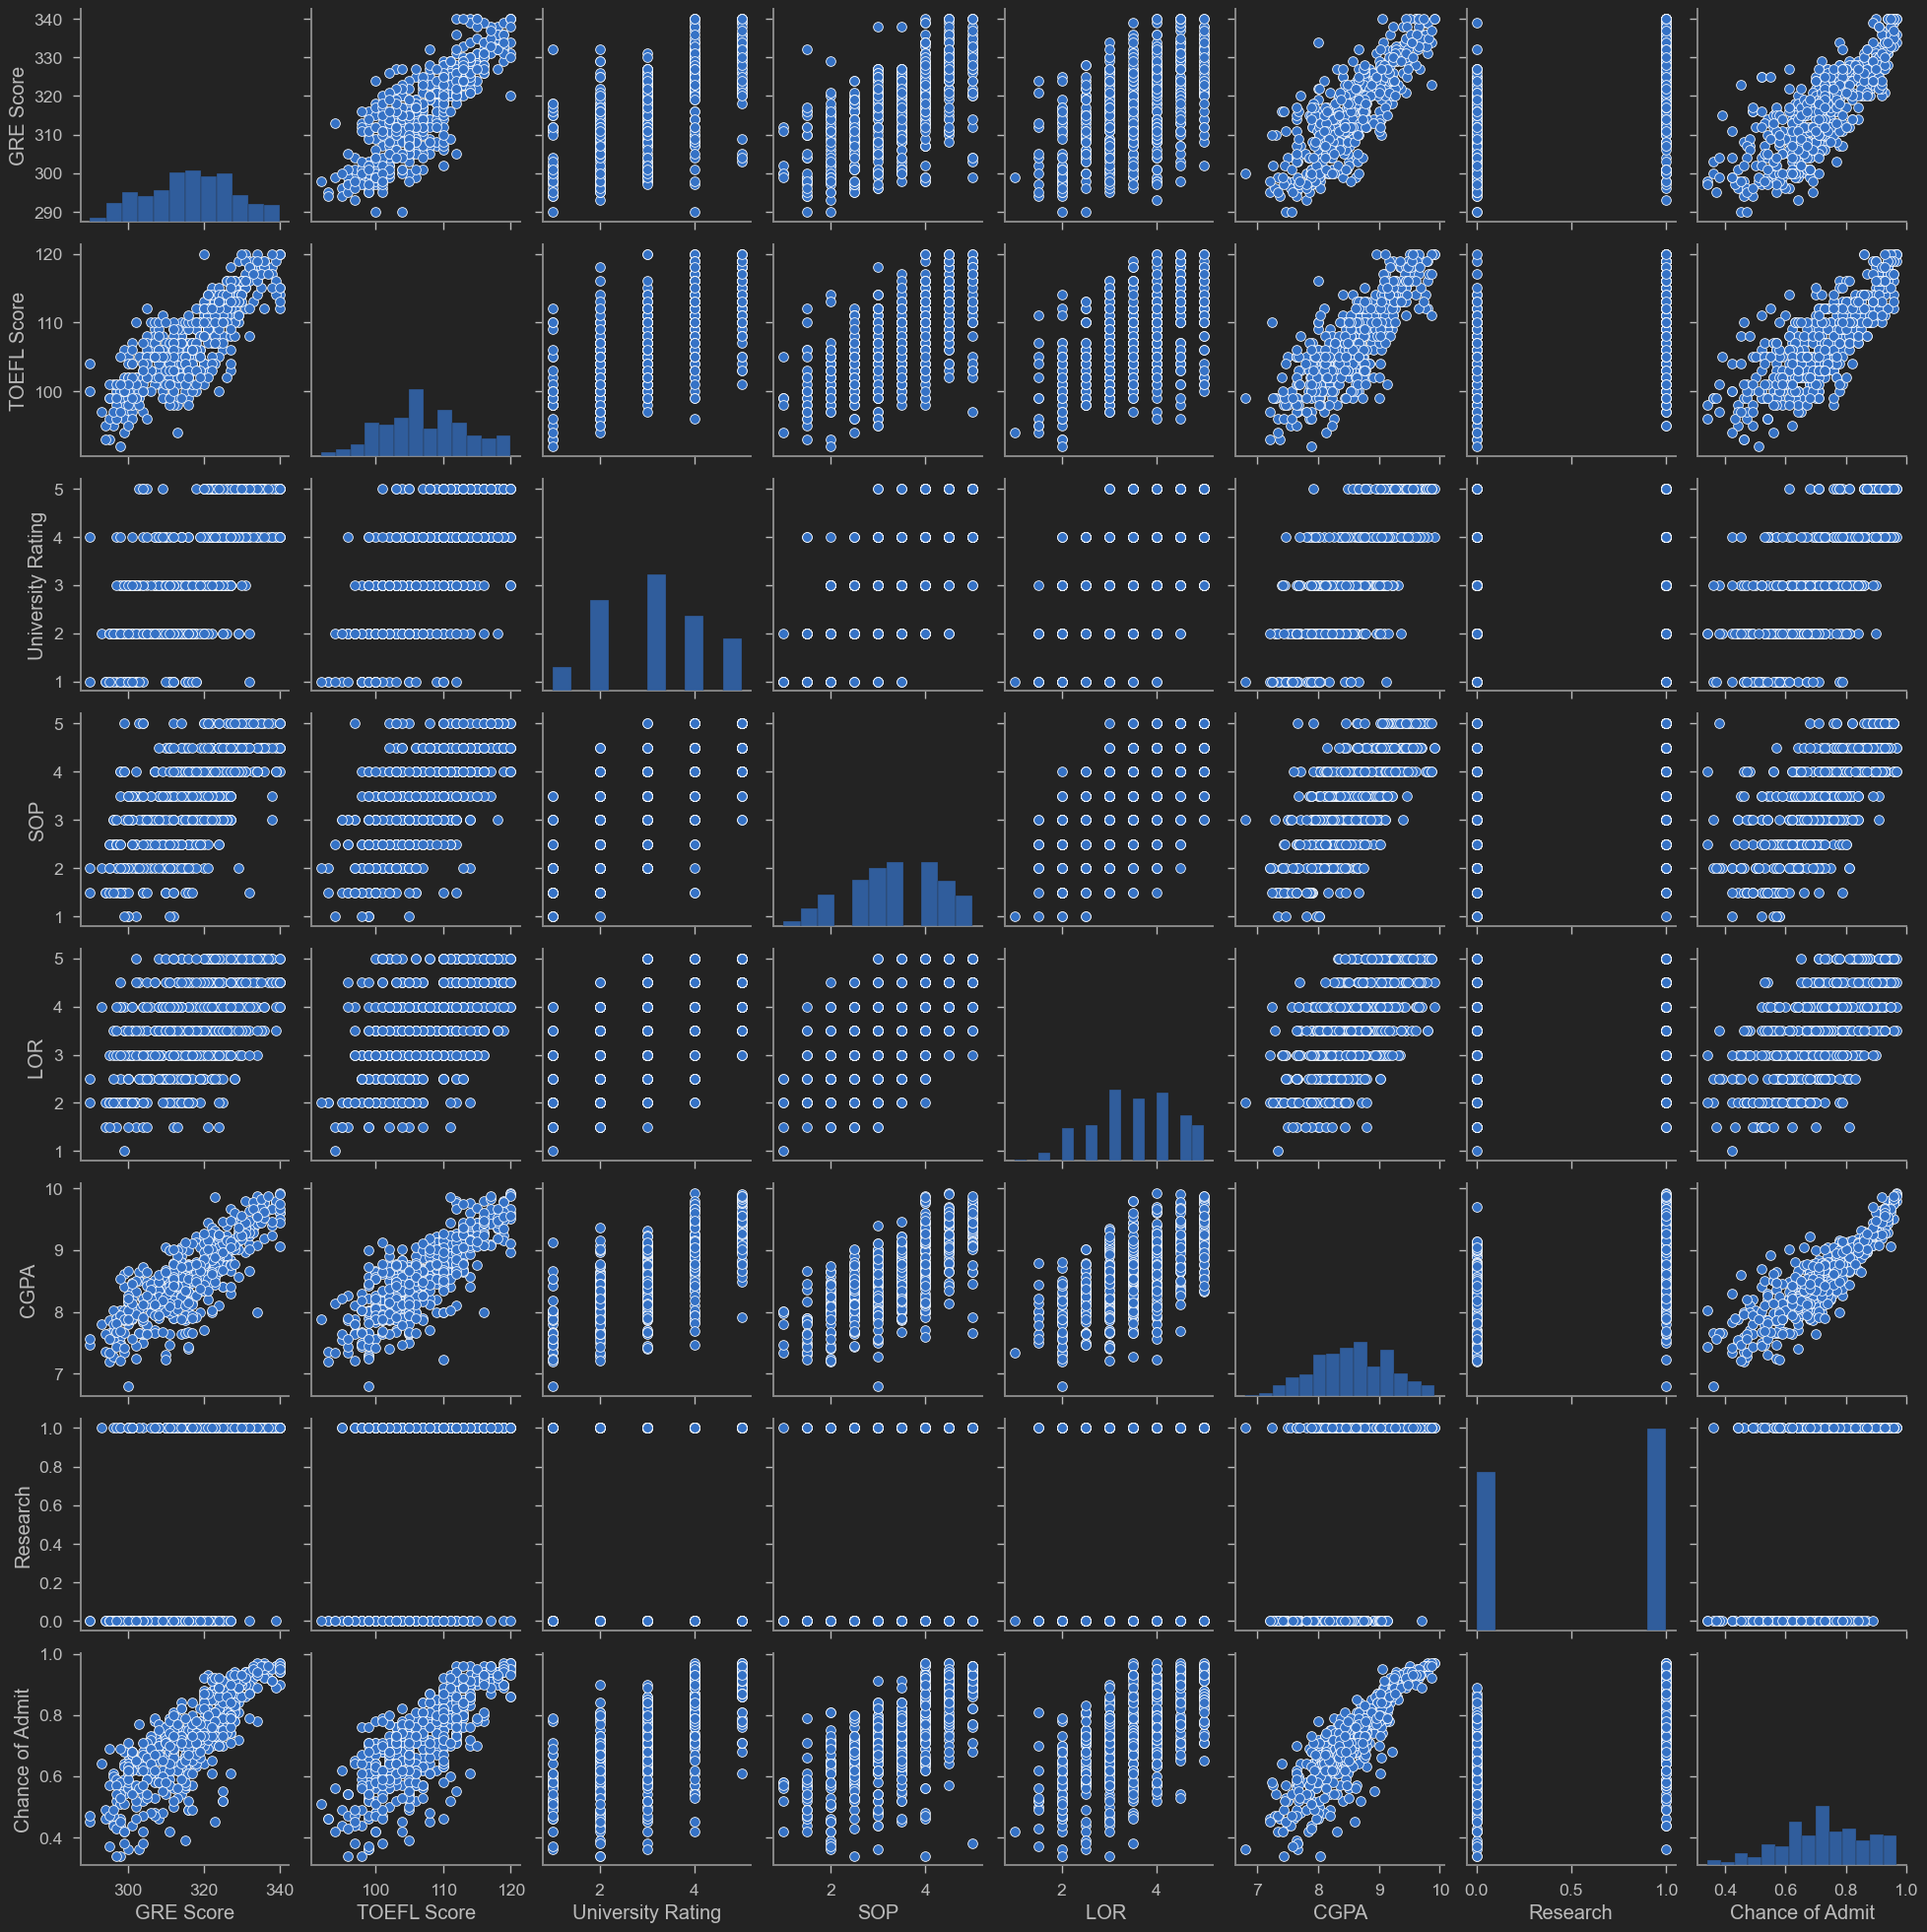

In [17]:
#relation between feature
sns.pairplot(admission_df)
#pair plot for the data with respect to chance of Admission

<Axes: >

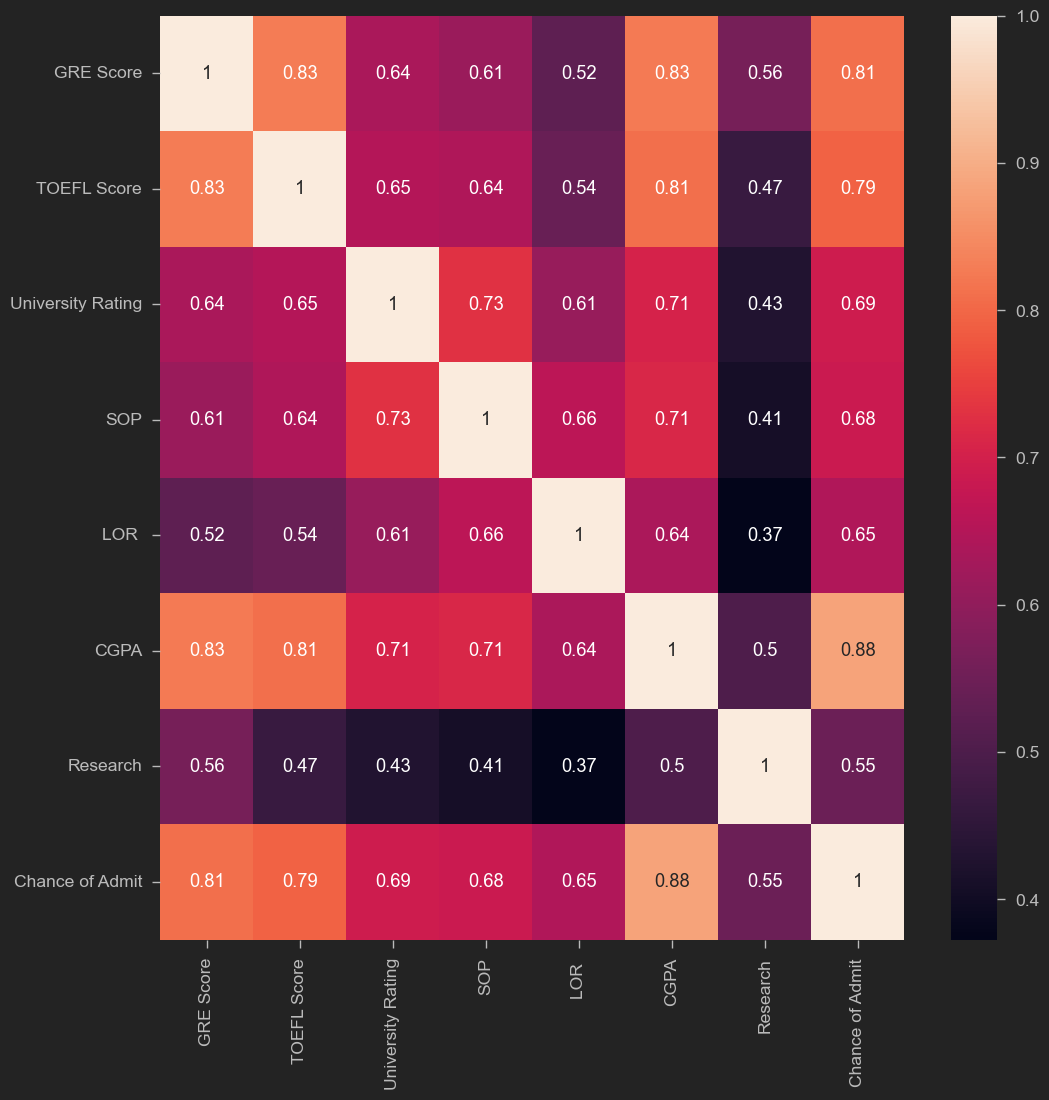

In [18]:
corr_matrix=admission_df.corr()
plt.figure(figsize=(12,12))
sns.heatmap(corr_matrix,annot=True)

# Task-4: Create training and testing dataset

In [19]:
X=admission_df.drop(columns='Chance of Admit')

In [20]:
Y=admission_df['Chance of Admit']

In [21]:
X.shape,Y.shape

((500, 7), (500,))

In [22]:
X

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1
496,337,117,5,5.0,5.0,9.87,1
497,330,120,5,4.5,5.0,9.56,1
498,312,103,4,4.0,5.0,8.43,0


In [23]:
Y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
495    0.87
496    0.96
497    0.93
498    0.73
499    0.84
Name: Chance of Admit, Length: 500, dtype: float64

In [24]:
x=np.array(X)
y=np.array(Y)

In [25]:
y

array([0.92, 0.76, 0.72, 0.8 , 0.65, 0.9 , 0.75, 0.68, 0.5 , 0.45, 0.52,
       0.84, 0.78, 0.62, 0.61, 0.54, 0.66, 0.65, 0.63, 0.62, 0.64, 0.7 ,
       0.94, 0.95, 0.97, 0.94, 0.76, 0.44, 0.46, 0.54, 0.65, 0.74, 0.91,
       0.9 , 0.94, 0.88, 0.64, 0.58, 0.52, 0.48, 0.46, 0.49, 0.53, 0.87,
       0.91, 0.88, 0.86, 0.89, 0.82, 0.78, 0.76, 0.56, 0.78, 0.72, 0.7 ,
       0.64, 0.64, 0.46, 0.36, 0.42, 0.48, 0.47, 0.54, 0.56, 0.52, 0.55,
       0.61, 0.57, 0.68, 0.78, 0.94, 0.96, 0.93, 0.84, 0.74, 0.72, 0.74,
       0.64, 0.44, 0.46, 0.5 , 0.96, 0.92, 0.92, 0.94, 0.76, 0.72, 0.66,
       0.64, 0.74, 0.64, 0.38, 0.34, 0.44, 0.36, 0.42, 0.48, 0.86, 0.9 ,
       0.79, 0.71, 0.64, 0.62, 0.57, 0.74, 0.69, 0.87, 0.91, 0.93, 0.68,
       0.61, 0.69, 0.62, 0.72, 0.59, 0.66, 0.56, 0.45, 0.47, 0.71, 0.94,
       0.94, 0.57, 0.61, 0.57, 0.64, 0.85, 0.78, 0.84, 0.92, 0.96, 0.77,
       0.71, 0.79, 0.89, 0.82, 0.76, 0.71, 0.8 , 0.78, 0.84, 0.9 , 0.92,
       0.97, 0.8 , 0.81, 0.75, 0.83, 0.96, 0.79, 0.

In [26]:
y=y.reshape(-1,1)

In [27]:
y

array([[0.92],
       [0.76],
       [0.72],
       [0.8 ],
       [0.65],
       [0.9 ],
       [0.75],
       [0.68],
       [0.5 ],
       [0.45],
       [0.52],
       [0.84],
       [0.78],
       [0.62],
       [0.61],
       [0.54],
       [0.66],
       [0.65],
       [0.63],
       [0.62],
       [0.64],
       [0.7 ],
       [0.94],
       [0.95],
       [0.97],
       [0.94],
       [0.76],
       [0.44],
       [0.46],
       [0.54],
       [0.65],
       [0.74],
       [0.91],
       [0.9 ],
       [0.94],
       [0.88],
       [0.64],
       [0.58],
       [0.52],
       [0.48],
       [0.46],
       [0.49],
       [0.53],
       [0.87],
       [0.91],
       [0.88],
       [0.86],
       [0.89],
       [0.82],
       [0.78],
       [0.76],
       [0.56],
       [0.78],
       [0.72],
       [0.7 ],
       [0.64],
       [0.64],
       [0.46],
       [0.36],
       [0.42],
       [0.48],
       [0.47],
       [0.54],
       [0.56],
       [0.52],
       [0.55],
       [0.

In [28]:
y.shape

(500, 1)

In [29]:
#scaling the data before training the model
from sklearn.preprocessing import StandardScaler, MinMaxScaler
#removes the mean and scales each feature/variable to unit variance.Tjis opertaion is performed feature-wise in an independent way
scaler_x=StandardScaler()
x=scaler_x.fit_transform(x)
print(x.mean(axis=0))
print(x.std(axis=0))

[ 1.76214598e-15  1.13686838e-15  1.42108547e-16 -8.52651283e-17
  4.26325641e-17  3.11928261e-15 -7.81597009e-17]
[1. 1. 1. 1. 1. 1. 1.]


In [30]:
scaler_y=StandardScaler()
y=scaler_y.fit_transform(y)
print(y.mean(axis=0))
print(y.std(axis=0))

[-3.30402372e-16]
[1.]


In [31]:
#spliting data into test and train data
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.15)

# Linear Regression model

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,accuracy_score

In [33]:
LinearRegression_model=LinearRegression()
LinearRegression_model.fit(X_train,Y_train)

LinearRegression()

In [34]:
accuracy_LinearRegression=LinearRegression_model.score(X_test,Y_test)
accuracy_LinearRegression

0.8433609825947008